In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a file path
filepath = "Netflix TV Shows and Movies.csv"

# Read in the data. 
df = pd.read_csv(filepath)

df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [4]:
# Replacing NaN with unknown to clean df
df['age_certification'].fillna('unknown', inplace=True)

/var/folders/w9/79wvvbs53wn9_hzqn2nlxnlc0000gn/T/ipykernel_19420/3621362582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_certification'].fillna('unknown', inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  5283 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [6]:
# Dropping nulls with no imbd votes
filtered_df = df.dropna()

In [7]:
selected_col = ["index", "title", "type", "description", "release_year", "age_certification", "imdb_score", "imdb_votes"]
clean_df = filtered_df[selected_col].copy()

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5263 entries, 0 to 5282
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5263 non-null   int64  
 1   title              5263 non-null   object 
 2   type               5263 non-null   object 
 3   description        5263 non-null   object 
 4   release_year       5263 non-null   int64  
 5   age_certification  5263 non-null   object 
 6   imdb_score         5263 non-null   float64
 7   imdb_votes         5263 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 370.1+ KB


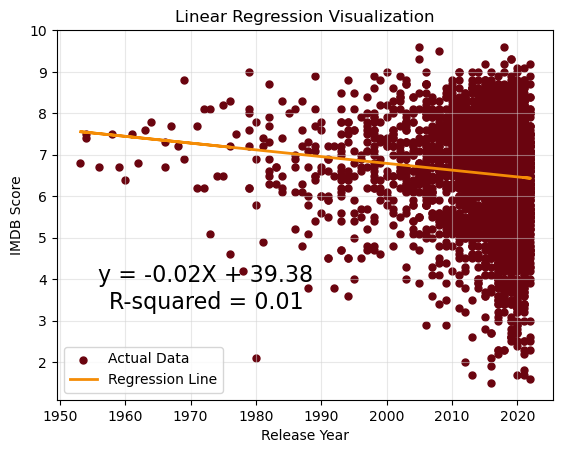

In [9]:
# with help from xpert

from sklearn.linear_model import LinearRegression


# Filter the data to include only imdb_votes <= 500000
filtered_df = clean_df[clean_df["release_year"] <= 500000]


# Generate some random data for demonstration
# plt.scatter(clean_df["release_year"], clean_df["imdb_score"])

X = clean_df["release_year"].values.reshape(-1, 1)
y = clean_df["imdb_score"].values.ravel()

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r_squared = model.score(X, y)


# Make predictions
y_pred = model.predict(X)



# Plot the data points and the regression line
plt.scatter(clean_df["release_year"], clean_df["imdb_score"], color='#6a040f', label='Actual Data', s=25)
plt.plot(X, y_pred, color='#f48c06', linewidth=2, label='Regression Line')

# Add grid lines
plt.grid(True)
plt.grid(axis='both', alpha=0.5, color='lightgrey')

# Print the regression formula and R-squared on the chart
plt.text(0.3, 0.3, f'y = {model.coef_[0]:.2f}X + {model.intercept_:.2f}\nR-squared = {r_squared:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=16)


plt.ylabel('IMDB Score')
plt.xlabel('Release Year')
plt.title('Linear Regression Visualization')
plt.legend()
plt.show()

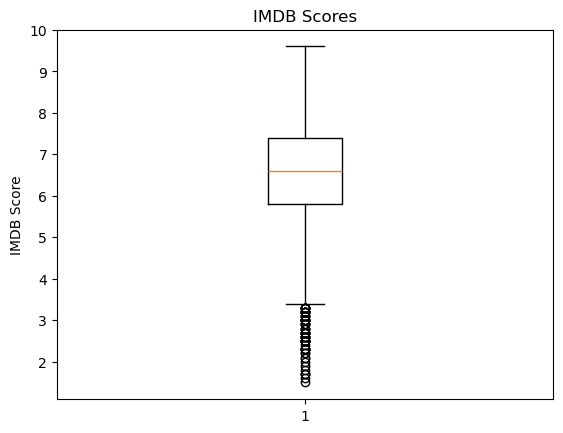

In [10]:
# Box plot for IMDb scores
plt.boxplot(clean_df["imdb_score"])
plt.title('IMDB Scores')
plt.ylabel('IMDB Score')
plt.show()

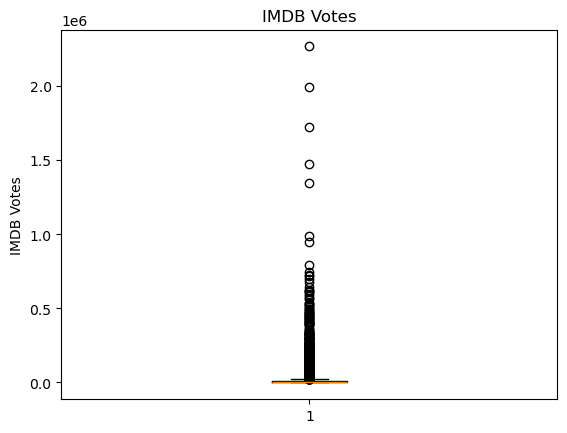

In [11]:
# Box plot for IMDb votes
plt.boxplot(clean_df["imdb_votes"])
plt.title('IMDB Votes')
plt.ylabel('IMDB Votes')
plt.show()

In [12]:
# Calculate z-scores for imdb_votes and imdb_score columns
z_scores_votes = (clean_df["imdb_votes"] - clean_df["imdb_votes"].mean()) / clean_df["imdb_votes"].std()
z_scores_score = (clean_df["imdb_score"] - clean_df["imdb_score"].mean()) / clean_df["imdb_score"].std()


In [13]:
# Generate random data for two groups
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=4.8, scale=2, size=120)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.7969775378903655
P-Value: 0.4263312154406744


In [14]:
# Calculate z-scores for imdb_votes and imdb_score columns
z_scores_votes = (clean_df["release_year"] - clean_df["release_year"].mean()) / clean_df["release_year"].std()
z_scores_score = (clean_df["imdb_score"] - clean_df["imdb_score"].mean()) / clean_df["imdb_score"].std()


In [15]:
# Generate random data for two groups
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=4.8, scale=2, size=120)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.7077035664004595
P-Value: 0.47988527537654213
